# 第3回講義 演習

今回は以下の構成に従って、PyTorchの基礎を学んでいきます。

1. PyTorchとは
    - 1.1 PyTorchとは
    - 1.2 ライブラリの構成
2. Tensor
    - 2.1　基本的な行列
    - 2.2 型の定義
    - 2.3 サイズの確認
    - 2.4 変形
    - 2.5 演算
    - 2.6 Numpy, list, scalarへの変換
    - 2.7 デバイス(CPU/CUDA)の指定
3. Autograd
4. nn
    - 4.1 functional
    - 4.2 Module
    - 4.3 Sequential
    - 4.4 最適化
    - 4.5 学習
    - 4.6 モデルの保存・読み込み・再学習
5. Tips:torchvision & DataLoader
5. 課題：PyTorchを使ってMLPを実装

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd

## 1. PyTorchとは

### 1.1. PyTorchとは

PyTorchは, 主にFacebookによって開発されているニューラルネットワーク用のライブラリです.
TensorFlowやTheanoでは, ネットワークの計算グラフを定義した後にコンパイルしてからデータを流す (静的フレームワーク) のに対し, PyTorchではデータが流れるごとに計算グラフを動的に構築する (動的フレームワーク) ため, データごとにグラフの形状が異なる自然言語処理などに向いているとされています.

公式ドキュメント: https://pytorch.org/docs/stable/index.html

### 1.2. ライブラリの構成

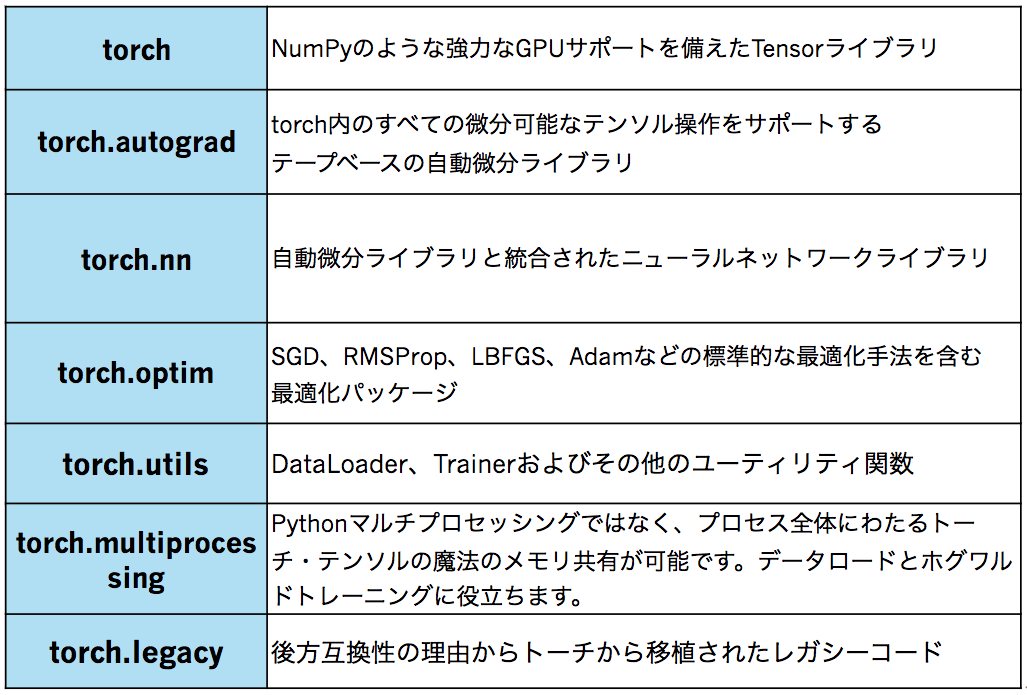

出典: PyTorch公式 (https://pytorch.org/about/)

出典: PyTorchのススメ (https://www.slideshare.net/yuyasoneoka/pytorch-80883065)

## 2. Tensor

Tensorは、変数をグラフ上のノードとして表すためのクラスです。

NumPyのndarrayに似たAPIのまま、GPU上での高速計算（CUDA）を扱えるようになっています。

### 2.1 基本的な行列

基本的な行列は、numpyと同様の関数を使って作ることが可能です。

In [ ]:
# listを基にしたTensor作成
a = torch.tensor([[1, 2], [3, 4]])
print("# torch.tensor:")
print(a)
print()

# numpyを基にしたTensor作成
a = torch.tensor(np.array([[1, 2], [3, 4]]))
print("# torch.tensor:")
print(a)
print()

# 全要素が1の行列 (numpy.ones)
a = torch.ones((2, 3))
print("# torch.ones:")
print(a)
print()

# 全要素が0の行列 (numpy.zeros)
a = torch.zeros((2, 3))
print("# torch.zeros:")
print(a)
print()

# 指定した値で満たされた行列 (numpy.full)
a = torch.full((2, 3), fill_value=99)
print("# torch.full:")
print(a)
print()

# 単位行列 (numpy.eye)
a = torch.eye(2)
print("# torch.eye:")
print(a)

一般的な乱数は大体揃っています. シードは`torch.manual_seed`で指定できます.

In [ ]:
torch.manual_seed(34)

# 標準正規分布 (numpy.random.randn)
print("# torch.randn（正規分布）:")
print(torch.randn(2))
print()

# [0, 1)の一様分布 (numpy.random.rand)
print("# torch.rand（一様分布）:")
print(torch.rand(2))
print()

# ベルヌーイ分布
probs = torch.rand((2, 3))
print("# 確率p:")
print(probs)
print()
print("# torch.bernoulli（ベルヌーイ分布）:")
print(torch.bernoulli(probs))
print()

# 多項分布 (np.random.multinomial)
probs = torch.tensor([0.2, 0.4, 0.4])
print("# torch.multinominal（多項分布）:")
print(torch.multinomial(probs, num_samples=10, replacement=True))

### 2.2 型の定義

dtypeの引数を指定することで、Tensorの型を定義することができます。

In [ ]:
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float)
print(a.dtype)
print(a)
print()

a = torch.ones((2, 3), dtype=torch.int)
print(a.dtype)
print(a)
print()

a = torch.ones((2, 3), dtype=torch.long)
print(a.dtype)
print(a)
print()

### 2.3 サイズの確認

`.size()` を用いることで、Tensorのサイズを確認することができます。

(`.size()`のエイリアスとして`.shape`も存在するので、numpyのように`.shape`で取得することも可能です。)


引数を指定することで特定の次元のサイズのみを取得することも可能です。

In [ ]:
a = torch.ones((2, 3))

print(a.size())  # Tensorのサイズを取得
print(a.shape)  # .shapeでも可能

print(a.size(0))  # Tensorの0次元目のサイズを取得

### 2.4 変形

Tensorの変形も同様に行えます。

軸方向を指定する引数名はnumpyではaxisでしたが、PyTorchではdimであることに注意する必要があります。

#### 2.4.1 次元の追加・除去

In [ ]:
a = torch.arange(6)  # 等差数列を作成 (numpy.arange)
print(a)
print(a.size())
print()

b = a.reshape(2, 3)  # 変形 (numpy.reshape)
print("# reshape(2,3):")
print(b)
print(b.size())
print()

b = a.view(1, 2, 3, 1) # dimの追加も可能
print("# view(1,2,3,1):")
print(b) 
print(b.size())
print()

# a.viewでエラーが出ることがある場合は.contiguous()を呼んでからview()する (参照: https://discuss.pytorch.org/t/runtimeerror-input-is-not-contiguous/930)
print(a.contiguous().view(1, 2, 3, 1))
print()

b = a.view(-1, 2) # 最後のdimのsizeを2に, 他のdimは"潰す"
print("# view(-1,2)で最後のdimのsizeを2に, 他のdimは潰す:")
print(b) 
print(b.size())
print()

b = a.unsqueeze(dim=1)  # 新しいdimを追加する。 a[:, None]でもOK (numpy.expand_dims)
print("# unsqueeze(dim=1)で次元をdim1に追加:")
print(b)
print(b.size())
print()

c = b.squeeze()  # squeezeを用いるとsizeが1の次元が除去される (numpy.squeeze)
print("# squeeze()でサイズ1の次元を削除:")
print(c)
print(c.size())
print()

#### 2.4.2 次元の入れ替え・変形

In [ ]:
a = torch.arange(6).reshape(1, 2, 3)
print(a)
print(a.size())
print()

b = a.transpose(0, 2)  # dim0とdim2の次元を入れ替える (numpy.transpose)
print("# transpose(0, 2)でdim0とdim2の次元を入れ替える:")
print(b) 
print(b.size())
print()

b = a.permute(0, 2, 1)  # 指定したdimの順に次元を入れ替える
print("# permute(0, 2, 1)で順番を並び替える:")
print(b) 
print(b.size())
print()


#### 2.4.3 分割

`torch.split`は指定したサイズでテンソルの分割を行います。

In [ ]:
a = torch.arange(10).reshape(2, 5)
print(a)
print()

b = torch.split(a, 2, dim=1)  # 2要素ごとに分割(割り切れない場合は最後の要素が余りになる) (numpy.split)
print("# torch.splitで2個ずつに分割:")
print(b)
print([c.size() for c in b])
print()

b = torch.split(a, [1, 3, 1], dim=1)  # リストを指定するとそのサイズで分割
print("# torch.splitで1,3,1個ずつに分割:")
print(b)
print([c.size() for c in b])

`torch.chunk`は指定した個数にテンソルを分割します。

In [ ]:
a = torch.arange(10).reshape(2, 5)
print(a)
print()

b = torch.chunk(a, 5, dim=1) # 5グループに分割
print("# chunkで5グループに分割:")
print(b)
print([c.size() for c in b])
print()

b = torch.chunk(a, 3, dim=1) # 3グループに分割(割り切れない場合は最後の要素が小さくなる)
print("# chunkで3グループに分割:")
print(b)
print([c.size() for c in b])
print()

#### 2.4.4 連結

`torch.cat`は既存のdimに沿ってテンソルを連結します。

In [ ]:
a = torch.arange(6).reshape(2, 3)
b = torch.arange(8).reshape(2, 4)
print(a)
print(a.size())
print()
print(b)
print(b.size())
print()

c = torch.cat([a, b], dim=1) # 既存のdimで連結する. 他のdimのsizeは揃っている必要がある (numpy.concatenate)
print("# torch.catでdim1方向に連結:")
print(c)
print(c.size())

`torch.stack`は新しいdimを作成し、そのdimに沿ってテンソルを連結します。

In [ ]:
a = torch.arange(6).reshape(2, 3)
b = torch.arange(6).reshape(2, 3)
print(a)
print(a.size())
print()

c = torch.stack([a, b], dim=2) # 新しいdimで連結する. 既存のdimのsizeはすべて揃っている必要がある (numpy.stack)
print("# torch.stackで新しい次元（dim2）方向に連結:")
print(c)
print(c.size())

#### 2.4.5 集約

`torch.gather`は指定したdimに沿って対象の行列(input)のindexの要素を集約し、indexと同じサイズの行列を出力します。

indexはinputと同じ次元数である必要があります。

2次元の行列(input)に対する出力(out)は以下のようになります。

```python
out[i][j] = input[index[i][j]][j]  # dim=0のとき
out[i][j] = input[i][index[i][j]]  # dim=1のとき
```

In [ ]:
a = torch.arange(6).reshape(2, 3)
print(a)
print()

# dim=0の場合、第0軸方向をindexに沿って集約、その他の軸方向については順番に集約する
index = torch.tensor([[1, 0, 1]])
print(index.size())
# この場合、第0軸方向は[1, 0, 1]、第1軸方向は[0, 1, 2]と集約されるので、[[a[1, 0], a[0, 1], a[1, 2]]]が出力される
b = torch.gather(a, dim=0, index=index)
print("# torch.gatherでdim0方向に関しては[0,1,0]で集める:")
print(b)
print(b.size())
print()

# dim=1の場合、第1軸方向をindexに沿って集約、その他の軸方向については順番に集約する
index = torch.tensor([[1, 0], [0, 1]])
print(index.size())
# この場合、第0軸方向は[[0, 0], [1, 1]]、第1軸方向は[[1, 0], [0, 1]]と集約されるので、[[a[0, 1], a[0, 0]], [a[1, 0], a[1, 1]]が出力される
b = torch.gather(a, dim=1, index=index)
print("# torch.gatherでdim1方向に関しては[0,1][1,0]で集める:")
print(b)
print(b.size())

`torch.index_select`も指定したdimに沿って対象の行列(input)のindexの要素を集約しますが、numpyのindexingに似た挙動です。

indexはinputと同じ次元数である必要はなく、出力もindexと異なるサイズの出力となりえます。

In [ ]:
a = torch.arange(6).reshape(2, 3)
print(a)
print()

# dim=0
index = torch.tensor([1, 0, 1])
print(index.size())
b = torch.index_select(a, dim=0, index=index)  # a[[1, 0, 1], :]
print("# torch.index_selectでdim0方向に関して[1,0,1]で要素（行）を集める:")
print(b)
print(b.size())
print()

# dim=1
index = torch.tensor([0, 1, 2, 1, 0])
print(index.size())
b = torch.index_select(a, dim=1, index=index)  # [:, [0, 1, 2, 1, 0]]
print("# torch.index_selectでdim1方向に関して[0,1,2,1,0]で要素（列）を集める:")
print(b)
print(b.size())

### 2.5 演算

#### 2.5.1 スカラー演算

numpyと同様にスカラー演算を実装することができます。

In [ ]:
a = torch.rand((2, 3))
b = torch.rand((2, 3))

print(a)
print(b)
print()

print("# 足し算:")
print(a + b)
print()

print("# 引き算:")
print(a - b)
print()

print("# 掛け算:")
print(a * b)
print()

print("# 割り算:")
print(a / b)
print()

print("# log:")
print(torch.log(a))
print()

print("# exp:")
print(torch.exp(a))
print()

print("# ルート:")
print(torch.sqrt(a))

#### 2.5.2 集約演算

集約演算もnumpyと同様に実装できますが、集約する次元をaxisではなくdimで指定することに注意する必要があります。

In [ ]:
a = torch.arange(10, dtype=torch.float32).reshape(2, 5)
print(a)
print()

print("# 合計(dim0):")
print(torch.sum(a, dim=0)) # a.sum(0)でも可
print()

print("# 平均(dim1):")
print(torch.mean(a, dim=1))
print()

print("# 分散(全体):")
print(torch.var(a)) # dimを指定しない場合は全体に対して適用
print()

print("# 標準偏差(dim -1, 最後の次元):")
print(torch.std(a, dim=-1)) # dim=-1とすると最後の次元に対して適用
print()

print("# 最大値、argmax(dim0):")
print(torch.max(a, dim=0)) # torch.maxは, maxとargmaxの両方を返す(torch.minも同様)
print()

print("# 最大値:")
print(torch.max(a)) # dimを指定しない場合はmax(or min)のみ返す
print()

#### 2.5.3 $Lp$ノルム

行列のノルムも、numpy同様に求めることができます。(numpy.linalg.norm)

$$
    ||x||_p = \left(x^p_1 + x^p_2 + \ldots + x^p_N\right)^{1/p}
$$

In [ ]:
a = torch.arange(3, dtype=torch.float)
print(a)
print(torch.norm(a, p=2))

#### 2.5.4 行列・テンソル積

行列の積もnumpy同様にdot, matmulで実装できます。

In [ ]:
a = torch.ones(4)
b = torch.ones(4)

c = torch.dot(a, b)
print("# torch.dot（ベクトルの内積）:")
print(c)
print()

a = torch.ones((2, 3))
b = torch.ones((3, 4))

c = torch.matmul(a, b)
print("# torch.matmul（行列積）:")
print(c)
print(c.size())

3階のテンソルの内積計算には`torch.bmm(batch1, batch2)`が使えます。

batch1とbatch2は3階のテンソルで、それぞれが(b, n, m)と(b, m, p)のsizeを有する場合に(b, n, p)のテンソルを出力します。

In [ ]:
a = torch.ones(2, 3, 4)
b = torch.ones(2, 4, 5)

print("# torch.bmm（batch matrix matrix product）:")
c = torch.bmm(a, b)
print(c)
print(c.size())


3階以上のテンソルを含む計算には`np.einsum`と同様にアインシュタインの縮約記法を用いる`einsum`での実装が便利です。

einsumを用いると、テンソル積の計算を行う行列のサイズを添字で表現し、計算を行う前と後のサイズを与えて計算を行うことができます。

詳しくはドキュメント（ https://pytorch.org/docs/stable/torch.html#torch.einsum ）を参照してください。

In [ ]:
a = torch.ones((2, 3, 4))
b = torch.ones((2, 3))

c = torch.einsum('ijk,ij->k', (a, b))
print(c)

sum_c = torch.einsum('ijk,ij->', (a, b))
print(sum_c)


#### 2.5.5 条件演算子

##### torch.where

時系列問題(RNNなど)でmaskを作るときなどに有効です.
```
torch.where(条件式, Trueの場合, Falseの場合)
```
のように書きます.

In [ ]:
torch.manual_seed(34)

a = torch.randn((2, 3))
print(a)
print()

print("# torch.whereで0以下のmask:")
masked_a = torch.where(a > 0, torch.ones_like(a), torch.zeros_like(a))
print(masked_a)

##### torch.clamp

numpy.clipのように、値を一定の範囲でクリッピングします. logなどでのアンダーフローを防ぐときなどに有効です.

In [ ]:
torch.manual_seed(34)

x = torch.randn((2, 3))
print(x)
print()

x_clipped = torch.clamp(x, 1e-10, 1e+10)
print("# torch.clampでクリッピング:")
print(x_clipped)
print(torch.log(x_clipped))
print()

print("# クリッピングしないとnanがでる:")
print(torch.log(x))

#### 2.5.6 比較演算子

##### torch.ge, torch.gt, torch.le, torch.lt, torch.eq

値の大小の比較を行います。

In [ ]:
a = torch.arange(5)
print(a)
print()

print("# a >= 3:")
print(torch.ge(a, 3))  # greater than or equal to
print(a >= 3)  # pythonの比較演算子を用いることも可能
print()

print("# a > 3:")
print(torch.gt(a, 3))  # greater than
print(a > 3)  # pythonの比較演算子を用いることも可能
print()

print("# a <= 3:")
print(torch.le(a, 3))  # less than or equal to
print(a <= 3)  # pythonの比較演算子を用いることも可能
print()

print("# a < 3:")
print(torch.lt(a, 3))  # less than
print(a < 3)  # pythonの比較演算子を用いることも可能
print()

print("# a == 3:")
print(torch.eq(a, 3))  # equal to
print(a == 3)  # pythonの比較演算子を用いることも可能
print()

### 2.6 Numpy, list, scalarへの変換

numpy, list, scalarへの変換は以下のようにして行います.

In [ ]:
a = torch.ones((2, 3))
print(a)
print()

# numpy.ndarrayへの変換
print("# a.numpy():")
print(a.numpy())
print()

# listへの変換
print("# a.tolist():")
print(a.tolist())
print()

# scalarへの変換には.item()を使います
print("# a.item():")
print(a.sum().item())

### 2.7 デバイス(CPU/CUDA)の指定

Tensorを扱うデバイスを指定するには、`device`引数や`.to()`メソッドなどを用います。

In [ ]:
a = torch.ones(1)
print(a)
print()

# GPUへの移動(すべて同じです)
b = a.cuda()
print(b)
b = a.to('cuda')
print(b)
b = torch.ones(1, device='cuda')
print(b)
print()

# CPUへの移動(すべて同じです)
c = b.cpu()
print(c)
c = b.to('cpu')  
print(c)
c = torch.ones(1, device='cpu')
print(c)

CUDAが使えるかどうかは`torch.cuda.is_available()`でわかるので、あらかじめこれでdeviceを取得しておくと便利です。

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.ones(1, device=device))

## 3. Autograd

PyTorchでは、Tensorの自動微分をサポートするautogradの機能が提供されております。

autogradの仕組みを理解する上で`Tensor`に加えて重要なクラスとして`Function`があります。

FunctionはTensorを入力としてTensorを出力する関数であり、Tensorをノード、Functionをエッジとして計算グラフが構築されます。

各Tensorは`.grad_fn`という属性を有しており、これはそのTensorを作成したFunctionを参照しています。（ユーザが自分で作成したTensorのgrad_fnはNoneになります）
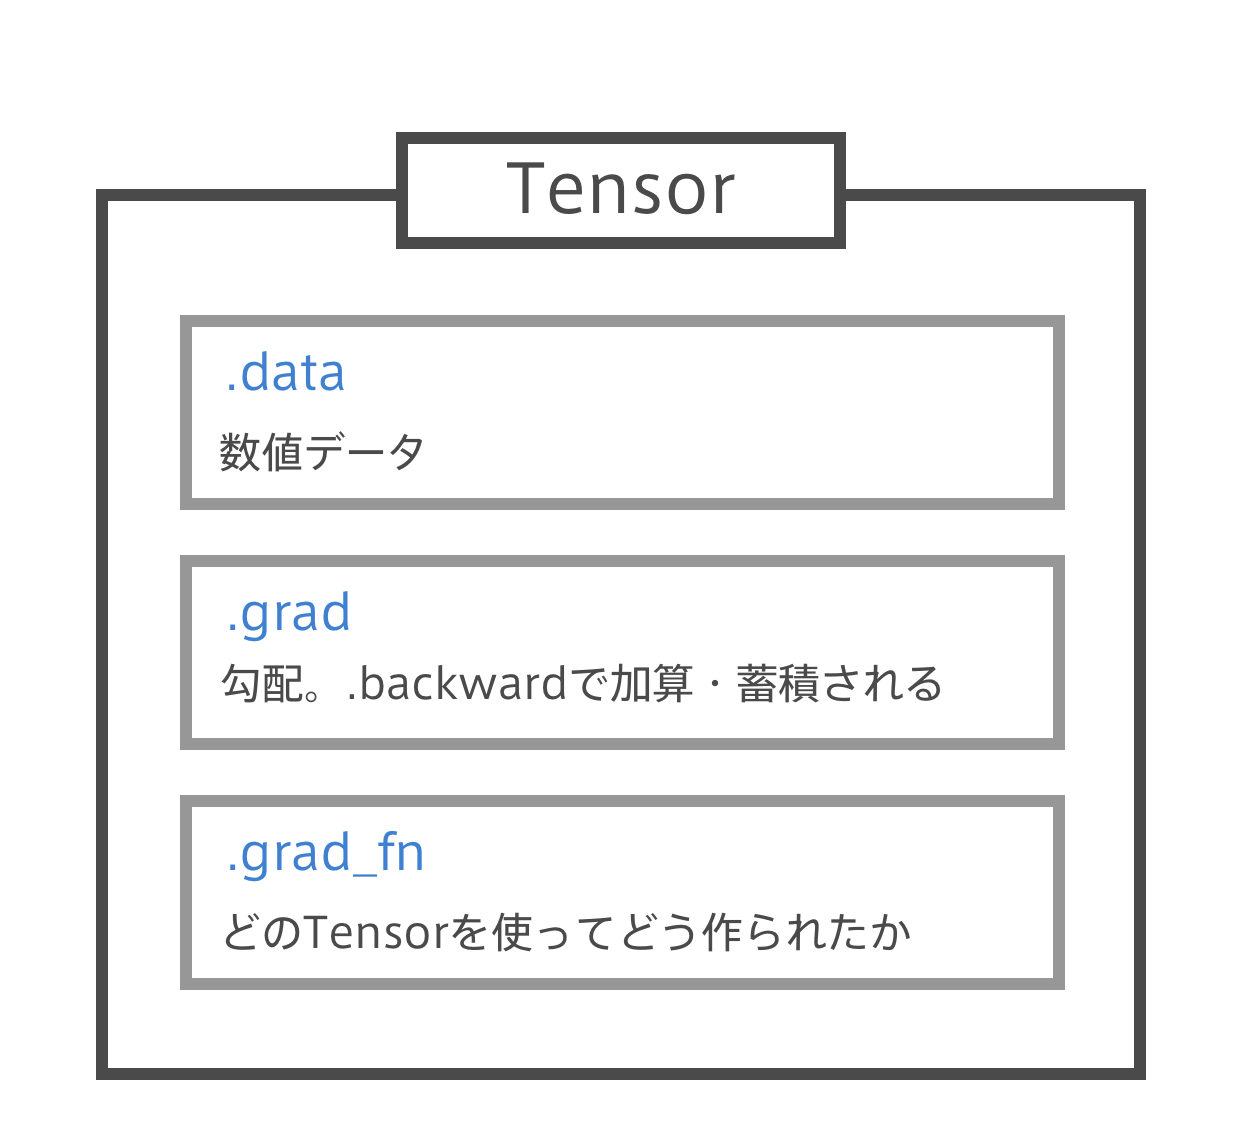


autogradを用いるには、まず、計算グラフを構築した後、forward関数によって入力のTensorから出力のTensorに対する順伝播の計算を行います。

その後、backward関数を呼ぶことにより、`requires_grad=True`を指定したすべてのTensorの目的関数に関する勾配が計算されます。

In [ ]:
# 順伝播の計算
x = torch.randn(4, 4)
y = torch.randn(4, 1)

w = torch.randn(4, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

y_pred = torch.matmul(x, w) + b

# 目的関数の定義
loss = (y_pred - y).pow(2).sum()

In [ ]:
# ユーザが作成したTensorはgrad_fn=None
print(x.grad_fn)
print(y.grad_fn)
print(w.grad_fn)
print(b.grad_fn)
print()

# Functionによって計算されたTensorはgrad_fnを有する
print(y_pred.grad_fn)

In [ ]:
# まだ勾配は計算されていない
print(x.grad)
print(y.grad)
print(w.grad)
print(b.grad)

In [ ]:
# 逆伝播
loss.backward()

In [ ]:
# requires_grad=Trueを指定した変数は勾配が計算されている
print(x.grad)
print(y.grad)
print(w.grad)
print(b.grad)

`.detach()`を使うことにより、Tensorの勾配計算を行わないようにすることもできます。

In [ ]:
x = torch.randn(4, 4)
y = torch.randn(4, 1)

w = torch.randn(4, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
b = b.detach()  # bの勾配計算を停止

y_pred = torch.matmul(x, w) + b

loss = (y_pred - y).pow(2).sum()

loss.backward()

print(w.grad)  # 勾配を有する
print(b.grad)  # 勾配を有さない


また、`with torch.no_grad():`でくくることで、その下で定義したTensorの勾配計算をまとめて停止させることが可能です。

これは、学習済みのモデルを評価する際に、モデルが`requires_grad=True`となっているパラメータを有する場合でも勾配計算を行わないようにしたいときなどに有用です。

In [ ]:
with torch.no_grad():
    y_eval = torch.matmul(x, w) + b  # y_predと同様の計算を行う

print('requires_grad of y_pred:', y_pred.requires_grad)  # requires_grad=True
print('requires_grad of y_eval:', y_eval.requires_grad)  # requires_grad=False

## 4. モデルの構築・学習

autogradは自動微分を可能にする強力な機能ですが、巨大なニューラルネットワークを低レベルのautogradのみで実装するのは大変です。

ニューラルネットワークを構築する際には、学習可能なパラメータを有するいくつかのレイヤーを定義することが一般的ですが、Pytorchにはこれを行う上で`nn`という便利な高レベルのパッケージが存在します。

今回の演習は実装を理解することを目的としているので、高レベルのAPIを多用しませんが、以下を用いて実装します。

更に`optim`を用いてoptimizerを実装することができます。



### 4.1 Module

`nn`には、ニューラルネットワークにおけるレイヤーのような役目を果たす`Module`が実装されています。

Tensorを入力としてTensorを出力しますが、学習可能なパラメータなどの内部状態を有し、forward関数とbackward関数を有します。

`nn.Module`をスーパークラスとして継承することで、幅広いレイヤーを実装することができます。


全結合層の実装

`__init__`と`forward`をoverrideすることで実装できます。

In [ ]:
rng = np.random.RandomState(1234)
random_state = 42


def relu(x):
    x = torch.where(x > 0, x, torch.zeros_like(x))
    return x


def softmax(x):
    x -= torch.cat([x.max(axis=1, keepdim=True).values] * x.size()[1], dim=1)
    x_exp = torch.exp(x)
    return x_exp/torch.cat([x_exp.sum(dim=1, keepdim=True)] * x.size()[1], dim=1)


class Dense(nn.Module):  # nn.Moduleを継承する
    def __init__(self, in_dim, out_dim, function=lambda x: x):
        super().__init__()
        # He Initialization
        # in_dim: 入力の次元数、out_dim: 出力の次元数
        self.W = nn.Parameter(torch.tensor(rng.uniform(
                        low=-np.sqrt(6/in_dim),
                        high=np.sqrt(6/in_dim),
                        size=(in_dim, out_dim)
                    ).astype('float32')))
        self.b = nn.Parameter(torch.tensor(np.zeros([out_dim]).astype('float32')))
        self.function = function

    def forward(self, x):  # forwardをoverride
        return self.function(torch.matmul(x, self.W) + self.b)

あらかじめ定義されたレイヤーを用いて、新たなモジュールを定義することもできます。

In [ ]:
class MLP(nn.Module):  # nn.Moduleを継承する
    def __init__(self, in_dim, hid_dim, out_dim):  # __init__をoverride
        super(MLP, self).__init__()
        self.linear1 = Dense(in_dim, hid_dim)
        self.linear2 = Dense(hid_dim, out_dim)

    def forward(self, x):  # forwardをoverride
        x = relu(self.linear1(x))
        x = softmax(self.linear2(x))
        return x

### 4.2 Sequential

`nn`には`Sequential`が用意されています。これを用いることで、あらかじめ定義されたレイヤーを重ねて多層ネットワークを定義することができます。

In [ ]:
mlp = nn.Sequential(
    Dense(2, 3, relu),  # 自分て定義した全結合層を重ねて2層ネットワークを定義する
    Dense(3, 2, softmax)
)

# mlp = MLP(2, 3, 2) でも同様のネットワークを定義できる

print(mlp)
print()

x = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = mlp(x)  # forward(x)が呼ばれる
print("# feedforward：")
print(y)
print()

print("# mlp.parameters()でモデルのパラメータ取得：")
print(mlp.parameters())

### 4.3 最適化

torch.optimに一般的なoptimizerが実装されています。

勾配のリセットは`.zero_grad()`で、パラメータの更新は`.step()`で行います。

```python
# optimizerの定義
optimizer = optim.SGD([W1, W2], lr=0.1)

# 勾配のリセット
optimizer.zero_grad()

# パラメータの更新
optimizer.step()
```

### 4.5 学習

これまで見てきたモジュールなどを用いてMLPのモデルを学習させる一連の流れを実装します。

In [ ]:
# XORをMLPで行う
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
t = torch.tensor([0, 1, 1, 0], dtype=torch.long)

# モデルの定義
mlp = MLP(2, 3, 2)

# 最適化の定義
optimizer = optim.SGD(mlp.parameters(), lr=0.1)  # Moduleのパラメータは.parameters()で取得できる

# モデルを訓練モードにする（Dropout等に関係）
mlp.train()

for i in range(1000):

    t_hot = torch.eye(2)[t]  # 正解ラベルをone-hot vector化

    # 順伝播
    y_pred = mlp(x)

    # 誤差の計算(クロスエントロピー誤差関数)
    loss = -(t_hot*torch.log(y_pred)).sum(axis=1).mean()

    # 逆伝播
    optimizer.zero_grad()
    loss.backward()

    # パラメータの更新
    optimizer.step()

    if i % 100 == 0:
        print(i, loss.item())

### 4.6 モデルの保存・読み込み・再学習

モデルを保存する際には、`torch.save()`を用いますが、モデルのインスタンスを直接保存するのではなく、モデルのパラメータの情報を有するstate_dictを保存し、読み込む際にもstate_dictを読み込んでモデルのインスタンスにloadするのが一般的です。

In [ ]:
print(list(mlp.parameters()))
print()

# state_dictの取得
state_dict = mlp.state_dict()
print(state_dict)

# モデルの保存
torch.save(state_dict, './model.pth')

In [ ]:
# モデルの定義
mlp2 = MLP(2, 3, 2)
print(list(mlp2.parameters()))  # ランダムな初期値
print()

# 学習済みパラメータの読み込み
state_dict = torch.load('./model.pth')
mlp2.load_state_dict(state_dict)
print(list(mlp2.parameters()))  # 学習済みパラメータ

## 5. Tips: torchvision & DataLoader

torchvisionは画像認識のためのデータセットや前処理、学習済みモデルなどが収められたpytorch公式のライブラリです。

MNISTなどのよく使われるデータセットを`torchvision.datasets`から簡単に読み込めるほか、前処理は`transform`としてまとめて`torch.utils.data.DataLoader`に渡すだけでOKです。

MNISTを使用する際の例を以下に示します.

```python
from torchvision import transforms, datasets

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(in_dim))
])

dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('~/data/mnist', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True
)
```

## 6. 課題：PyTorchを使ってMLPを実装

In [ ]:
from torchvision import datasets, transforms

In [ ]:
class MLP(nn.Module):
    def __init__(self, in_dim, hid_dim, out_dim):
        super(MLP, self).__init__()
        self.linear1 = Dense(in_dim, hid_dim)
        self.linear2 = Dense(hid_dim, out_dim)

    def forward(self, x):
        x = relu(self.linear1(x))
        x = softmax(self.linear2(x))
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
in_dim = 784
hid_dim = 200
out_dim = 10
lr = 0.001
batch_size = 32
n_epochs = 10


mlp = MLP(in_dim, hid_dim, out_dim).to(device)

optimizer = optim.SGD(mlp.parameters(), lr=lr)

DataLoaderの定義

In [ ]:
# 前処理を定義
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(in_dim))
])

# torchvisionのdatasetsを使ってMNISTのデータを取得
# ミニバッチ化や前処理などの処理を行ってくれるDataLoaderを定義
dataloader_train = torch.utils.data.DataLoader(
    datasets.MNIST('./data/mnist', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True
)

dataloader_valid = torch.utils.data.DataLoader(
    datasets.MNIST('./data/mnist', train=False, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=False
)

学習

In [ ]:
for epoch in range(n_epochs):
    losses_train = []
    losses_valid = []
    train_num = 0
    train_true_num = 0
    valid_num = 0
    valid_true_num = 0

    mlp.train()  # 訓練時には勾配を計算するtrainモードにする
    for x, t in dataloader_train:
        true = t.tolist()

        t_hot = torch.eye(10)[t]  # 正解ラベルをone-hot vector化

        # テンソルをGPUに移動
        x = x.to(device)
        t_hot = t_hot.to(device)

        # 順伝播
        y = mlp.forward(x)

        # 誤差の計算(クロスエントロピー誤差関数)
        loss = -(t_hot*torch.log(y)).sum(axis=1).mean()

        # 誤差の逆伝播
        optimizer.zero_grad()
        loss.backward()

        # パラメータの更新
        optimizer.step()

        # モデルの出力を予測値のスカラーに変換
        pred = y.argmax(1)

        losses_train.append(loss.tolist())

        acc = torch.where(t - pred.to("cpu") == 0, torch.ones_like(t), torch.zeros_like(t))
        train_num += acc.size()[0]
        train_true_num += acc.sum().item()

    mlp.eval()  # 評価時には勾配を計算しないevalモードにする
    for x, t in dataloader_valid:
        true = t.tolist()

        t_hot = torch.eye(10)[t]  # 正解ラベルをone-hot vector化

        # テンソルをGPUに移動
        x = x.to(device)
        t_hot = t_hot.to(device)

        # 順伝播
        y = mlp.forward(x)

        # 誤差の計算(クロスエントロピー誤差関数)
        loss = -(t_hot*torch.log(y)).sum(axis=1).mean()

        # モデルの出力を予測値のスカラーに変換
        pred = y.argmax(1)

        losses_valid.append(loss.tolist())

        acc = torch.where(t - pred.to("cpu") == 0, torch.ones_like(t), torch.zeros_like(t))
        valid_num += acc.size()[0]
        valid_true_num += acc.sum().item()

    print('EPOCH: {}, Train [Loss: {:.3f}, Accuracy: {:.3f}], Valid [Loss: {:.3f}, Accuracy: {:.3f}]'.format(
        epoch,
        np.mean(losses_train),
        train_true_num/train_num,
        np.mean(losses_valid),
        valid_true_num/valid_num
    ))